## AST Project 1
### Collaborators: 'Oswald, Emma Jo', 'Kho, Jonathan Andrew', 'Andalib, Arian Alexander', 'Stone, Ashley Taylor'
### Michigan State University
### AST 304

In [1]:
########################################################################
# Team Spectacular Stellars: 'Oswald, Emma Jo', 'Kho, Jonathan Andrew', 'Andalib, Arian Alexander', 'Stone, Ashley Taylor'
# AST 304, Fall 2022
# Michigan State University
########################################################################

# The libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.constants as sc
%matplotlib inline


### <u> _Problems and the Results:_

##### 1. Implement routines that advance the solution to a system of ODE’s by one step h for the forward Euler, second-order Runge-Kutta, and fourth3 AST 304 Group Computational Project order Runge-Kutta. The partially completed routines are in the file ode.py in your project repository. Once you have the routines written, you will need to test them. The file test_ode.py. This test integrates the simpler system of equations for which you can verify that the solution is z(t) = {sin(ωt), cos(ωt)}. Run test_ode.py and compare the output of this test with the file sample_output. They should be close.

In [15]:
# unit test for integration methods
# do not alter this file

# our test problem is to integrate
#   dz/dt = [ w*z[1], -w*z[0] ]
# with initial conditions
#   z(t=0) = [ 0.0, 1.0 ].
# The solution is z = [ sin(w*t), cos(w*t) ].  For this test, we set
# w = 2*pi, and integrate from t = 0 to t = 2.
#

import numpy as np
from ode import fEuler, rk2, rk4

integration_methods = {
        'Euler': fEuler,
        'RK2': rk2,
        'RK4': rk4
        }

def f(t,z,w):
    """
    function returning RHS of our ODE.
    
    Arguments
        t (scalar)
        z (2 dimensional array)            
        w (scalar)
    Returns
        dzdt (2-D numpy array)
    """
    dzdt = np.zeros_like(z)
    dzdt[0] =  w*z[1]
    dzdt[1] = -w*z[0]
    return dzdt

def soln(t,w):
    """
    returns analytical solution of ODE
    Arguments
        t (scalar or array-like)
            independent variable
        w (scalar)
            parameter in system of ODEs
    Returns
        2-d solution array at times in argument t
    """
    return np.array([np.sin(w*t),np.cos(w*t)])

def do_one(method):
    # set initial conditions
    z = np.zeros(2)
    z[1] = 1.0

    # period is 1.0, frequency is 2*pi, stepsize is 1/100 of a period
    P = 1.0
    w = 2.0*np.pi/P
    h = P/100.0

    # we'll integrate from t = 0 to t = t_f = 2*P
    t = 0.0
    t_f = 2*P
    # Number of steps
    N = int(t_f/h)

    # check everything!
    print('integrating from t = {0} to t = {1} with {2} steps; h = {3:5.3f}\n'.\
        format(t,t_f,N,h))
    
    # print every 5th line
    PRINT_INTERVAL = 5
    # counter for steps
    cnt = 0
    # format for outputing results
    fmt = '{0:5d}{1:7.3f}   {2:7.3f}{3:7.3f}{4:9.2e}   {5:7.3f}{6:7.3f}{7:9.2e}'
    # format for header
    head_fmt = '{0:>5s}{1:>7s}   {2:>7s}{3:>7s}{4:>9s}   {5:>7s}{6:>7s}{7:>9s}'
    print(head_fmt.format(
        'step','t','z0','s0','|z0-s0|','z1','s1','|z1-s1|')
    )
    stepper = integration_methods[method]
    for step in range(N):
        z = stepper(f,t,z,h,args=w)
        t += h
        cnt += 1
        if (cnt % PRINT_INTERVAL == 0):
            zs = soln(t,w)
            resid = np.abs(z-zs)
            print(fmt.format(cnt,t,z[0],zs[0],resid[0],z[1],zs[1],resid[1]))

print('\n====================Forward Euler====================')
do_one('Euler')
print('\n================2nd order Runge-Kutta================')
do_one('RK2')
print('\n================4th order Runge-Kutta================')
do_one('RK4')


====================Forward Euler====================
integrating from t = 0.0 to t = 2.0 with 200 steps; h = 0.010

 step      t        z0     s0  |z0-s0|        z1     s1  |z1-s1|
    5  0.050     0.312  0.309 2.66e-03     0.961  0.951 9.54e-03
   10  0.100     0.599  0.588 1.10e-02     0.826  0.809 1.66e-02
   15  0.150     0.833  0.809 2.35e-02     0.606  0.588 1.87e-02
   20  0.200     0.989  0.951 3.77e-02     0.323  0.309 1.41e-02
   25  0.250     1.050  1.000 5.05e-02     0.002 -0.000 2.17e-03
   30  0.300     1.010  0.951 5.87e-02    -0.325 -0.309 1.63e-02
   35  0.350     0.869  0.809 5.96e-02    -0.627 -0.588 3.95e-02
   40  0.400     0.639  0.588 5.11e-02    -0.873 -0.809 6.42e-02
   45  0.450     0.342  0.309 3.25e-02    -1.038 -0.951 8.69e-02
   50  0.500     0.005 -0.000 4.55e-03    -1.104 -1.000 1.04e-01
   55  0.550    -0.340 -0.309 3.06e-02    -1.061 -0.951 1.10e-01
   60  0.600    -0.657 -0.588 6.92e-02    -0.914 -0.809 1.05e-01
   65  0.650    -0.916 -0.809 1.07e-0

- ##### Write a python script that uses the functions in ode.py and kepler.py to do the following. For each of the three integration methods, integrate the equations of motion over 3 orbital periods, and compute the relative error in the total energy at the end of this time. Take the semi-major axis a = 1 and total mass m = 1. Make the ellipse have an eccentricity of e = 0.5 so that x0 = (1 + e)a = 1.5a. Do each integration for a range of step sizes h =h0, h0/2, h0/4, . . . h0/1024, where h0 = 0.1 T with T being the expected orbital period. Plot the error in the energy as a function of h. Does it scale as expected? Is it better to use linear or logarithmic axes in plotting the error?

In [3]:
from ode import * # fEuler, rk2, rk4
from kepler import * # kinetic_energy, potential_energy, total_energy, derivs, integrate_orbit, set_initial_conditions, integration_methods
import numpy as np
import matplotlib.pyplot as plt

# Initial setup
a = 1 # AU
m = 1 # Solar mass
e = 0.5 # Eccentricity
G = 6.6743*10**-11 # Gravitational constant



init, eps0, T = set_initial_conditions(a,m,e)

# Expected energy of the system
Energy = total_energy(init,m)

h0 = 0.1*T # T = expected orbital period

sizes = [2**x for x in range(0,11)]
steps = [h0/n for n in sizes]

In [4]:
# fEuler 

# List with position, velocity, energy, and times for all step sizes
Eulervals = []

for i in range(len(steps)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0 = init,m=m,tend = 3*T,h = steps[i],method='Euler')
    
    Eulervals.append([ts,Xs,Ys,KEs,PEs,TEs])

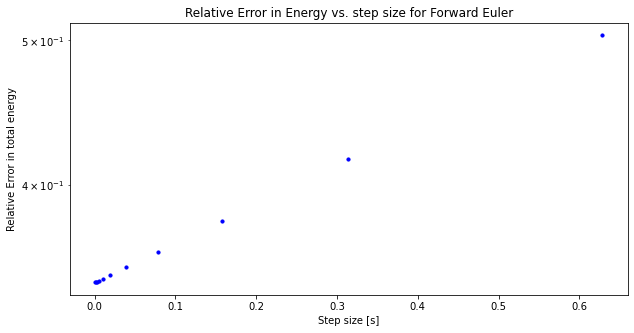

In [40]:
plt.figure(figsize = (10,5))
plt.scatter(steps[0],Eulervals[0][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[1],Eulervals[1][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[2],Eulervals[2][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[3],Eulervals[3][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[4],Eulervals[4][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[5],Eulervals[5][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[6],Eulervals[6][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[7],Eulervals[7][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[8],Eulervals[8][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[9],Eulervals[9][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[10],Eulervals[10][-1][-1]-Energy,s = 10,color = 'b')
plt.yscale('log')
plt.xlabel('Step size [s]')
plt.ylabel('Relative Error in total energy')
plt.title('Relative Error in Energy vs. step size for Forward Euler')
plt.show()

In [6]:
# RK2

# List with position, velocity, energy, and times for all step sizes
RK2vals = []

for i in range(len(steps)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0 = init,m=m,tend = 3*T,h = steps[i],method='RK2')
    
    RK2vals.append([ts,Xs,Ys,KEs,PEs,TEs])

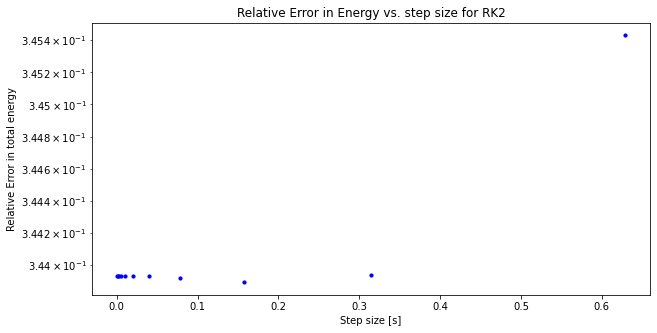

In [41]:
plt.figure(figsize = (10,5))
plt.scatter(steps[0],RK2vals[0][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[1],RK2vals[1][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[2],RK2vals[2][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[3],RK2vals[3][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[4],RK2vals[4][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[5],RK2vals[5][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[6],RK2vals[6][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[7],RK2vals[7][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[8],RK2vals[8][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[9],RK2vals[9][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[10],RK2vals[10][-1][-1]-Energy,s = 10,color = 'b')
plt.yscale('log')
plt.xlabel('Step size [s]')
plt.ylabel('Relative Error in total energy')
plt.title('Relative Error in Energy vs. step size for RK2')
plt.show()

In [8]:
# RK4

# List with position, velocity, energy, and times for all step sizes
RK4vals = []

for i in range(len(steps)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0 = init,m=m,tend = 3*T,h = steps[i],method='RK4')
    
    RK4vals.append([ts,Xs,Ys,KEs,PEs,TEs])

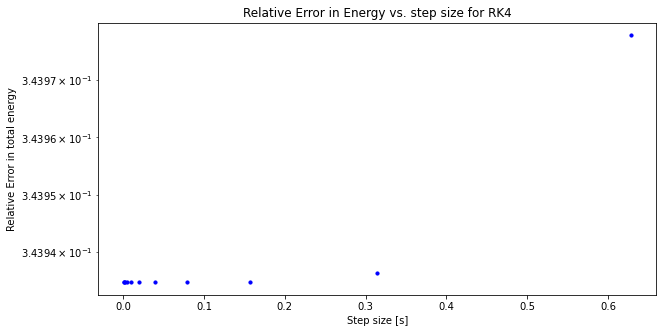

In [42]:
plt.figure(figsize = (10,5))
plt.scatter(steps[0],RK4vals[0][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[1],RK4vals[1][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[2],RK4vals[2][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[3],RK4vals[3][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[4],RK4vals[4][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[5],RK4vals[5][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[6],RK4vals[6][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[7],RK4vals[7][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[8],RK4vals[8][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[9],RK4vals[9][-1][-1]-Energy,s = 10,color = 'b')
plt.scatter(steps[10],RK4vals[10][-1][-1]-Energy,s = 10,color = 'b')
plt.yscale('log')
plt.xlabel('Step size [s]')
plt.ylabel('Relative Error in total energy')
plt.title('Relative Error in Energy vs. step size for RK4')
plt.show()

- #####  For the smallest and largest values of h for each of the three integration methods, plot the particle trajectory. Does the orbit close? Is it an ellipse? Does it have the correct semi-major axis? Also plot the energies— potential, kinetic, and total—as a function of time. Put the energies all on the same plot.


Text(0, 0.5, 'y')

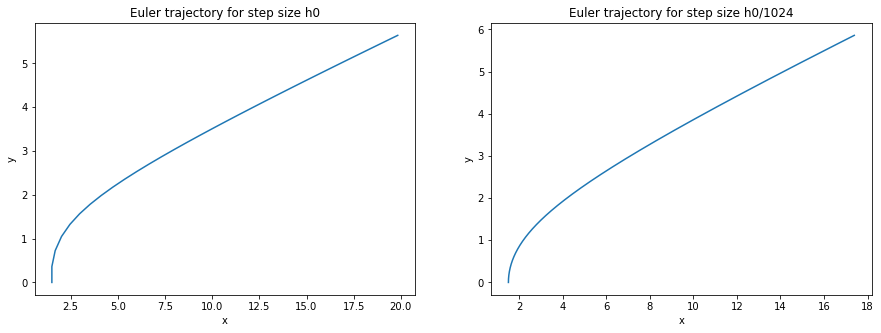

In [27]:
# Euler orbits

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.plot(Eulervals[0][1],Eulervals[0][2])
plt.title('Euler trajectory for step size h0')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.plot(Eulervals[10][1],Eulervals[10][2])
plt.title('Euler trajectory for step size h0/1024')
plt.xlabel('x')
plt.ylabel('y')

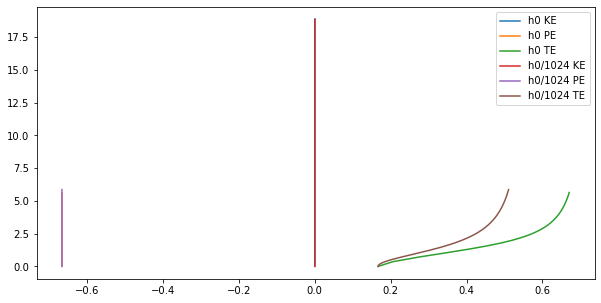

In [26]:
# Euler energies

plt.figure(figsize = (10,5))
plt.plot(Eulervals[0][3],Eulervals[0][0],label = 'h0 KE')
plt.plot(Eulervals[0][4],Eulervals[0][2],label = 'h0 PE')
plt.plot(Eulervals[0][5],Eulervals[0][2],label = 'h0 TE')

plt.plot(Eulervals[10][3],Eulervals[10][0],label = 'h0/1024 KE')
plt.plot(Eulervals[10][4],Eulervals[10][2],label = 'h0/1024 PE')
plt.plot(Eulervals[10][5],Eulervals[10][2],label = 'h0/1024 TE')
plt.legend()

Text(0, 0.5, 'y')

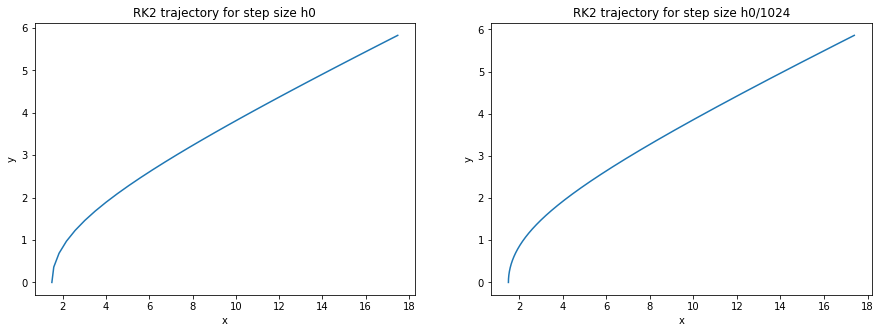

In [28]:
# RK2 orbits

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.plot(RK2vals[0][1],RK2vals[0][2])
plt.title('RK2 trajectory for step size h0')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.plot(RK2vals[10][1],RK2vals[10][2])
plt.title('RK2 trajectory for step size h0/1024')
plt.xlabel('x')
plt.ylabel('y')

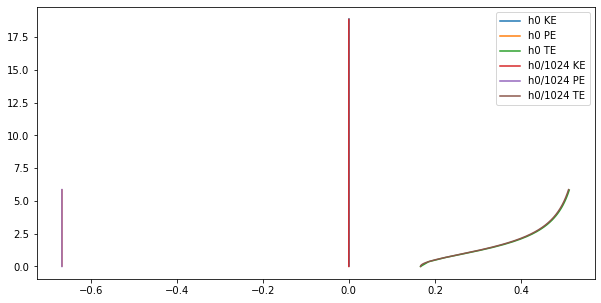

In [29]:
# RK2 energies
plt.figure(figsize = (10,5))
plt.plot(RK2vals[0][3],RK2vals[0][0],label = 'h0 KE')
plt.plot(RK2vals[0][4],RK2vals[0][2],label = 'h0 PE')
plt.plot(RK2vals[0][5],RK2vals[0][2],label = 'h0 TE')

plt.plot(RK2vals[10][3],RK2vals[10][0],label = 'h0/1024 KE')
plt.plot(RK2vals[10][4],RK2vals[10][2],label = 'h0/1024 PE')
plt.plot(RK2vals[10][5],RK2vals[10][2],label = 'h0/1024 TE')
plt.legend()

Text(0, 0.5, 'y')

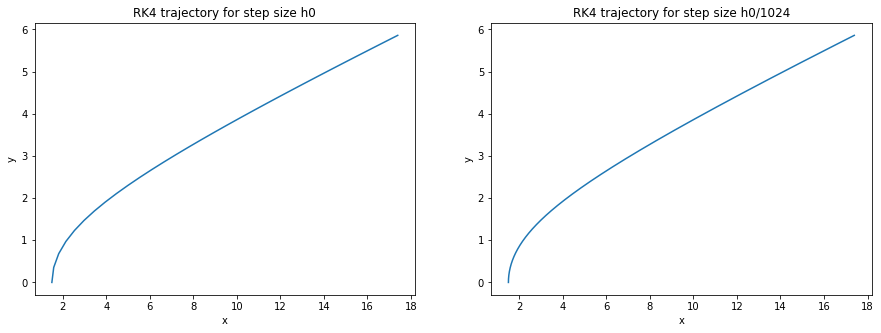

In [30]:
# RK4 orbits

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.plot(RK4vals[0][1],RK4vals[0][2])
plt.title('RK4 trajectory for step size h0')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.plot(RK4vals[10][1],RK4vals[10][2])
plt.title('RK4 trajectory for step size h0/1024')
plt.xlabel('x')
plt.ylabel('y')

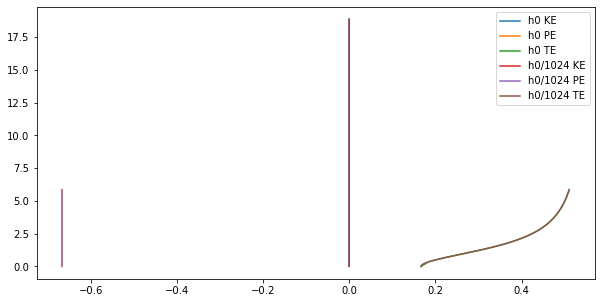

In [31]:
# RK4 energies

plt.figure(figsize = (10,5))
plt.plot(RK4vals[0][3],RK4vals[0][0],label = 'h0 KE')
plt.plot(RK4vals[0][4],RK4vals[0][2],label = 'h0 PE')
plt.plot(RK4vals[0][5],RK4vals[0][2],label = 'h0 TE')

plt.plot(RK4vals[10][3],RK4vals[10][0],label = 'h0/1024 KE')
plt.plot(RK4vals[10][4],RK4vals[10][2],label = 'h0/1024 PE')
plt.plot(RK4vals[10][5],RK4vals[10][2],label = 'h0/1024 TE')
plt.legend()

### <u>_Discussion/Conclusion_

